<a href="https://colab.research.google.com/github/AndrewPolyak/PyTorch-Self-Learning/blob/main/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Andrew Polyak PyTorch Self-Learning

This represents an original attempt at completing these practice materials provided by Daniel Bourke.

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

Fri Mar 28 04:39:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

# ✓

2.6.0+cu124


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

1. Autonomous vehicles / self-driving vehicles. Tesla is *the* example. https://research.aimultiple.com/computer-vision-use-cases/
2. Optical character recognition for intelligent document processing
3. Argriculture. Automated weed detection and targeted srpaying. Can accuractely distinguish between crops and weeds. https://blog.roboflow.com/computer-vision-applications/

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

When a model is unable to generalize / make accuract predictions on new data because it has fit itself too closely or even exactly to its training data. https://www.ibm.com/think/topics/overfitting

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. Early stopping --> stop training before the model starts learning the noise within the model.
2. Train with more data --> Expand the training set to provide more oopportuntiies to parse out the dominant relationship among the input and output variables.
3. Data augmentation --> Add some noisy data to the model training

https://www.ibm.com/think/topics/overfitting

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

Done.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
import torchvision

In [5]:
training_data = torchvision.datasets.MNIST(root="train_data",
                                           train=True,
                                           download=True,
                                           transform=torchvision.transforms.ToTensor(),
                                           target_transform=None)
testing_data = torchvision.datasets.MNIST(root="test_data",
                                           train=False,
                                           download=True,
                                           transform=torchvision.transforms.ToTensor(),
                                           target_transform=None)

# ✓

100%|██████████| 9.91M/9.91M [00:00<00:00, 11.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 343kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.18MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.94MB/s]
100%|██████████| 9.91M/9.91M [00:00<00:00, 12.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 341kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.18MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.80MB/s]


In [6]:
training_data

# ✓

Dataset MNIST
    Number of datapoints: 60000
    Root location: train_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
testing_data

# ✓

Dataset MNIST
    Number of datapoints: 10000
    Root location: test_data
    Split: Test
    StandardTransform
Transform: ToTensor()

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [8]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '2')

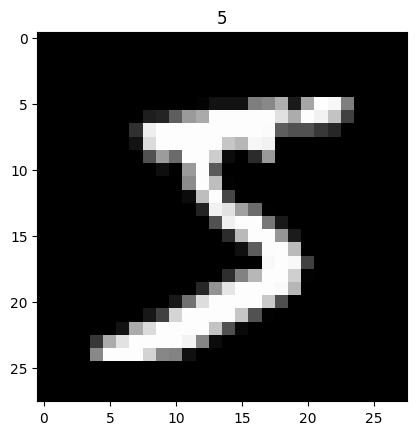

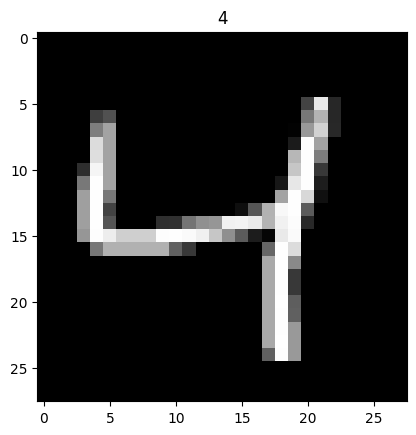

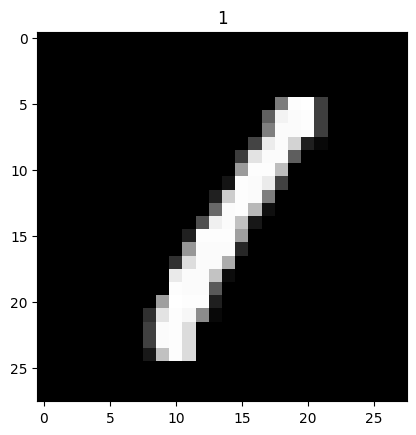

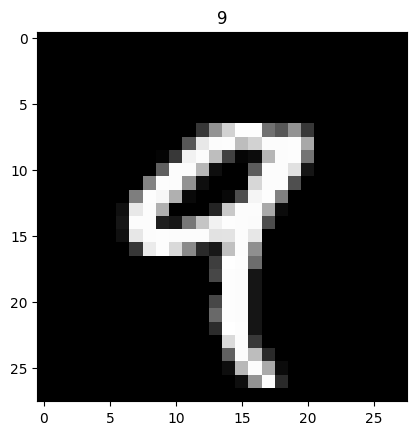

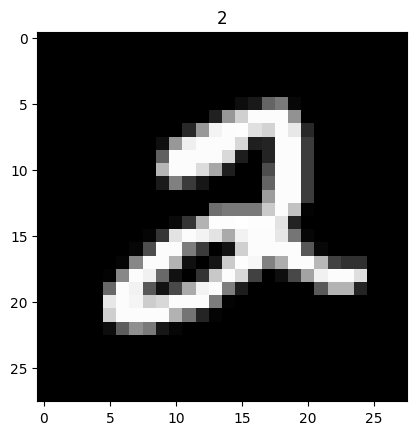

In [9]:
X, y = training_data[0]
plt.figure()
plt.imshow(X.squeeze(), cmap="gray")
plt.title(y)

X, y = training_data[2]
plt.figure()
plt.imshow(X.squeeze(), cmap="gray")
plt.title(y)

X, y = training_data[3]
plt.figure()
plt.imshow(X.squeeze(), cmap="gray")
plt.title(y)

X, y = training_data[4]
plt.figure()
plt.imshow(X.squeeze(), cmap="gray")
plt.title(y)

X, y = training_data[5]
plt.figure()
plt.imshow(X.squeeze(), cmap="gray")
plt.title(y)

# ✓

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [10]:
from torch.utils.data import DataLoader

In [11]:
train_dataloader = DataLoader(training_data,
                              batch_size=32,
                              shuffle=True)
test_dataloader = DataLoader(testing_data,
                             batch_size=32,
                             shuffle=False)

# ✓

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [12]:
from torch import nn

In [13]:
class TinyVGGModel(nn.Module):
  def __init__(self, in_dim, hid_dim, out_dim):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=in_dim,
                  out_channels=hid_dim,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hid_dim,
                  out_channels=hid_dim,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3,
                     stride=1,
                     padding=0)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hid_dim,
                  out_channels=hid_dim,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hid_dim,
                  out_channels=hid_dim,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3,
                     stride=1,
                     padding=0)
    )
    self.output_block = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hid_dim*256,
                  out_features=out_dim)
    )

  def forward(self, x):
    return self.output_block(self.conv_block_2(self.conv_block_1(x)))

  # ✓

In [14]:
model_cpu = TinyVGGModel(in_dim=1,
                     hid_dim=10,
                     out_dim=len(training_data.classes)).to("cpu")
model_cpu

# ✓

TinyVGGModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (output_block): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [15]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_cpu.parameters(),
                            lr=0.1)

 # ✓

In [16]:
from timeit import default_timer as timer
from tqdm import tqdm

In [17]:
train_time_start_model_cpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------------")

  model_cpu.train()
  loss_accumulate = 0
  for batch, (X, y) in enumerate(train_dataloader):
    y_logit = model_cpu(X)
    loss = loss_fn(y_logit, y)
    loss_accumulate += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  loss_accumulate = loss_accumulate / len(train_dataloader)
  print(f"\nTrain Loss: {loss_accumulate}\n")

  loss_accumulate = 0
  model_cpu.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      y_logit = model_cpu(X)
      loss = loss_fn(y_logit, y)
      loss_accumulate += loss

  loss_accumulate = loss_accumulate / len(test_dataloader)
  print(f"\nTest Loss: {loss_accumulate}\n")

train_time_end_model_cpu = timer()
total_train_time_model_cpu = train_time_end_model_cpu - train_time_start_model_cpu
print(f"Time to train on CPU: {total_train_time_model_cpu} seconds")

 # ✓

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------------

Train Loss: 0.24345794320106506



 33%|███▎      | 1/3 [00:59<01:58, 59.25s/it]


Test Loss: 0.07189267873764038

Epoch: 1
---------------

Train Loss: 0.07578133046627045



 67%|██████▋   | 2/3 [01:50<00:54, 54.26s/it]


Test Loss: 0.06358345597982407

Epoch: 2
---------------

Train Loss: 0.05781858041882515



100%|██████████| 3/3 [02:39<00:00, 53.24s/it]


Test Loss: 0.05748975649476051

Time to train on CPU: 159.73446141600002 seconds


In [64]:
model_gpu = TinyVGGModel(in_dim=1,
                     hid_dim=10,
                     out_dim=len(training_data.classes)).to("cuda")
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_gpu.parameters(),
                            lr=0.1)

 # ✓

In [67]:
train_time_start_model_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------------")

  model_gpu.train()
  loss_accumulate = 0
  for batch, (X, y) in enumerate(train_dataloader):
    X, y = X.to("cuda"), y.to("cuda")

    y_logit = model_gpu(X)
    loss = loss_fn(y_logit, y)
    loss_accumulate += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  loss_accumulate = loss_accumulate / len(train_dataloader)
  print(f"\nTrain Loss: {loss_accumulate}\n")

  loss_accumulate = 0
  model_gpu.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      X, y = X.to("cuda"), y.to("cuda")

      y_logit = model_gpu(X)
      loss = loss_fn(y_logit, y)
      loss_accumulate += loss

  loss_accumulate = loss_accumulate / len(test_dataloader)
  print(f"\nTest Loss: {loss_accumulate}\n")

train_time_end_model_gpu = timer()
total_train_time_model_gpu = train_time_end_model_gpu - train_time_start_model_gpu
print(f"Time to train on GPU: {total_train_time_model_gpu} seconds")

 # ?

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------------

Train Loss: 2.2999255657196045



 33%|███▎      | 1/3 [00:12<00:24, 12.08s/it]


Test Loss: 2.3027172088623047

Epoch: 1
---------------

Train Loss: 2.3019750118255615



 67%|██████▋   | 2/3 [00:23<00:11, 11.40s/it]


Test Loss: 2.301198720932007

Epoch: 2
---------------

Train Loss: 2.301790952682495



100%|██████████| 3/3 [00:33<00:00, 11.32s/it]


Test Loss: 2.3018486499786377

Time to train on GPU: 33.95989867000003 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

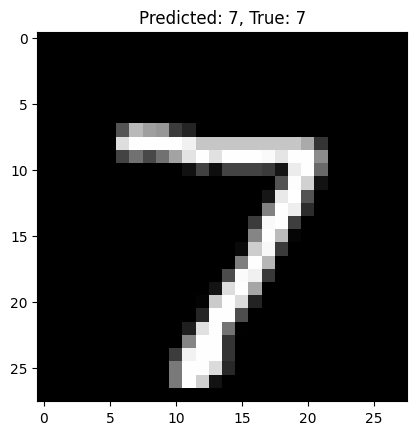

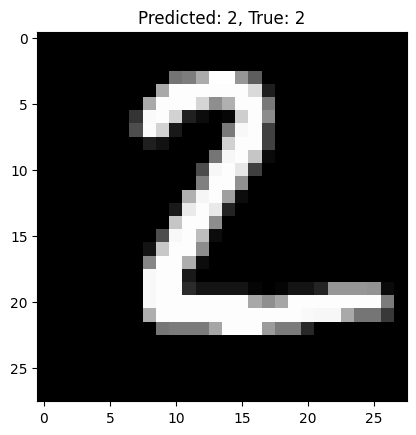

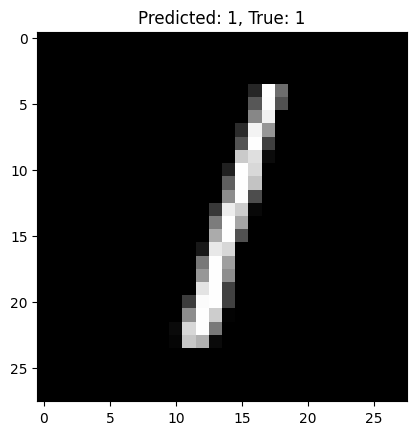

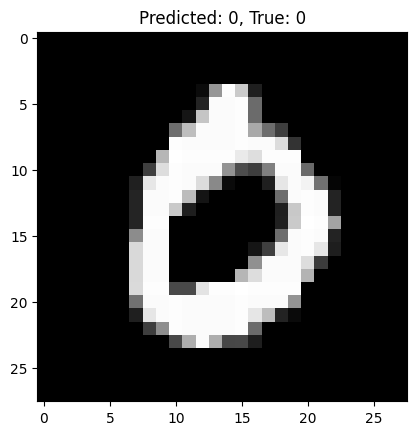

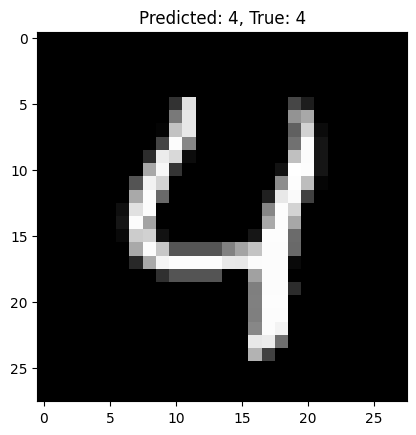

In [98]:
y_preds = []
y_trues = []

y_preds_for_tensors = []

model_cpu.eval()
with torch.inference_mode():
    for X, y in test_dataloader:
        y_pred = model_cpu(X).argmax(dim=1)
        y_pred_numpy = y_pred.cpu().numpy()
        y_preds.extend(y_pred_numpy)
        y_trues.extend(y.cpu().numpy())
        y_preds_for_tensors.append(y_pred)

for i in range(5):
    plt.figure()
    plt.imshow(testing_data[i][0].squeeze(), cmap="gray")
    plt.title(f"Predicted: {y_preds[i]}, True: {y_trues[i]}")
    plt.show()

 # ✓

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [99]:
try:
  import torchmetrics, mlxtend
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend

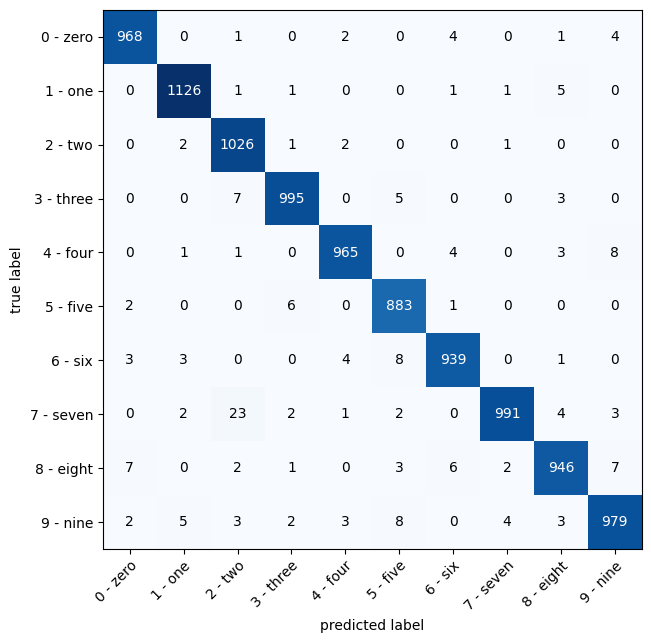

In [102]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

y_preds_for_tensors_cat = torch.cat(y_preds_for_tensors).cpu()

confmat = ConfusionMatrix(num_classes=len(training_data.classes), task="multiclass")
confmat_tensor = confmat(preds=y_preds_for_tensors_cat,
                         target=testing_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=training_data.classes,
    figsize=(10, 7)
)

-- Note: I'll stop here. I'll continue practicing with more free-form mini-projects.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?